<h3> ID:A1818 <h3>
<h3> Date:2/27/2019 <h3>
  
 <h1> House Prices: Advanced Regression Techniques <h1>
 

  <h1> Summary:</h1>
<p style='text-align: justify;'>
'House price' is the one of the top most kaggle machine learning computation problem based on house size, feature,location etc.This problem is based on regression problem and i am trying to do some feature engineering data cleaning and some mathematical analysis for minimizing the error rate for the prediction.Here i use tensorflow low level Api and also some other algorithm for the comparison of better understanding In this in depth explanation, guided by exploratory data analysis, there are several key things to look at: Location is key factor to look at for high valuations, therefore a safe, well facilitated and well positioned house within a good neighborhood, will tend to have a greater price than the usual.The more space, rooms and land that the house contains, the higher the valuation should be though there might be exceptions The extra utilities like a garage  will add extra value as it is highly desirable.Based on the above mentioned intuitions, we will step forward to do an exploratory data analysis(EDA) followed by feature engineering, one hot encoding and lastly, learning.To build a model that predicts prices we need to go through
some important steps. </p>

1.   Data Cleaning
2.   Data preprocessing and handling missing values
3.   Feature Engineering
4.   Implementations of Regressor Models
5.   Neural Network















## Purpose of the Assignment:
The purpose of this Assignment is to predict the Sales Price for each house. The Assignment explicitly focuses on the Machine Learning Approach to the prediction, Data Preprocessing, Data Cleansing, Missing Data Handling, Outliers Detection and Dropping, Hyper Parameter Tuning and Accuracy Improvement.
***


 <h3>Importing librairies and load data</h3>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
from scipy import stats
from scipy.stats import norm, skew 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr


In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('My colours are ready! :)')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
warnings.filterwarnings("ignore", category=DeprecationWarning)

My colours are ready! :)



<p>Now importing  train and test datasets as  pandas dataframe.<br></p>

In [0]:
from google.colab import drive 
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/Hiperdyne/House price/train.csv')
test = pd.read_csv('/content/drive/My Drive/Hiperdyne/House price/test.csv')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


  <h1> 1. Data Cleaning:  </h1>
  <p>Functions<br></p>
* Checking numbers of samples and features
* Saving ID columns from both train and test datasets
* Checking the data size after dropping the ID variable


In [0]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


  ### 1.1 Visualization and Removal of Outliers
<p>According to the data-description there are outliers in the column: GrLivArea. Lets plot this feature against SalePrice and discover outliers if there is any</p>



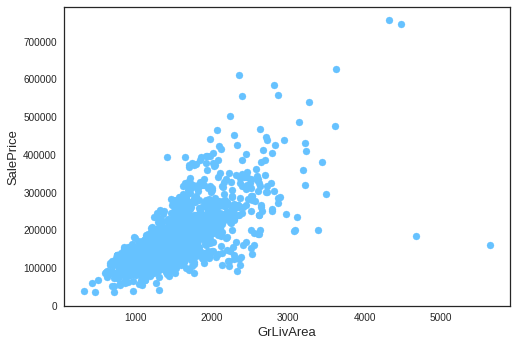

In [0]:

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


#### Cell Report:
<p align="justify">At the bottom right there are two extremely large GrLivArea that are of a low price. These values are huge oultliers.Therefore we can safely remove them. </p>

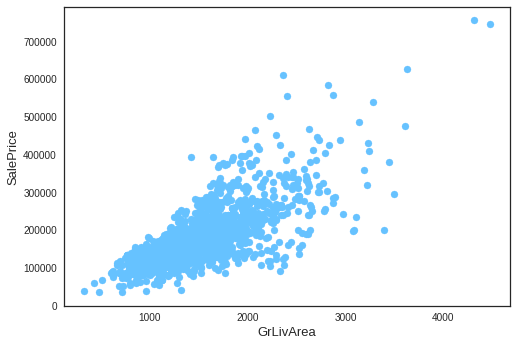

In [0]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### 1.2 Normalization of Skewness for Target Variable

<p>**SalePrice** is the variable we need to estimate. So we need to analize whether the variable is skewed or not. We should normalize it if it is fould to be skewed.</p>



 mu = 180932.92 and sigma = 79467.79



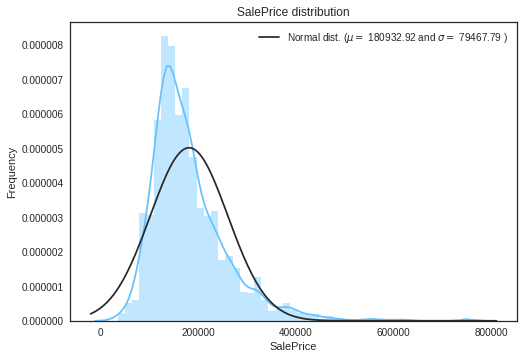

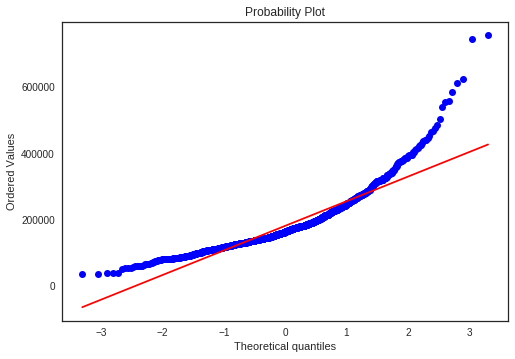

In [0]:
#Make a copy of train & test DB
trainNoOutlier = train.copy()
testNoOutlier = test.copy()

sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### Cell Report:
<p>The target variable is right skewed.As (linear) models love normally distributed data ,we need to transform this variable and make it more normally distributed.Skewness of the Target Variable was graphically represented and it was found to be right(positive) skewed.This is verified by the fact that the Mean of the Distribution is greater than the Mode.The Probability Plot(Similar to Q-Q Plot) also verifies the right skewness of Target Variable. Considering the Standard Deviation, the Random Variables that fall outside (-3,3) are potential outliers.Kurtosis indicates the peakiness of the distribution.</p>

  <h1> 2. Data preprocessing and handling missing values: </h1>
  
  Most of the machine learning algorithms cannot handle missing value. So, we need to fill
  those places with something relevant and intuitively properly.
 
 
 


 mu = 12.02 and sigma = 0.40



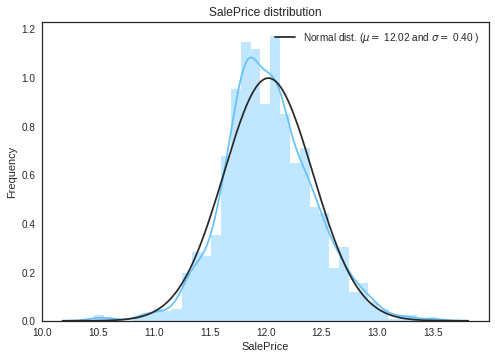

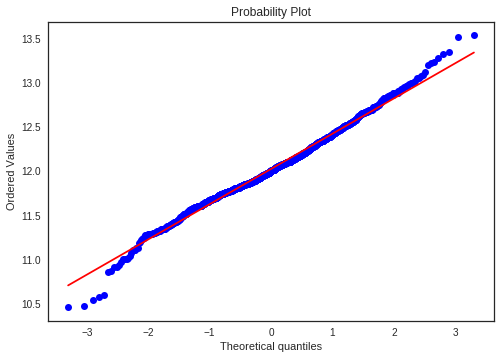

In [0]:

train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);


(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### Cell Report:
<p>The skew seems now corrected and the data appears more normally distributed.Log Transformation was applied to the Target Variable because of its high skewness.Log Transformation greatly reduced the Skewness of the Target Variable.The Kurtosis was also reduced.The Distribution Plot and The Probability Plot verify the conclusion.The difference between the previous two Plots and Log Transformation Plots is clearly visible. The Data now appears more Normally Distributed.</p> 

<p>First we concate the train and test data in the same dataframe for easy preprocessing</p>

In [0]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
trainRaw = train.copy()
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


<h3>2.1 Handeling Missing data:</h3>

<p align="justify">Now we will cycle through each feature with missing values and treat them individually based on the data description or any specific logical judgement.First we discover the columns with missing values</p>

In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


<h2>Cell Report:</h2><br>
**1.** Number of Missing Values were investigated.<br>
**2.** Though some features like 'PoolQC', 'MiscFeature', 'Alley' and  had more than 90% plus missing values, they were not dropped because those missing values indicate a meaning and can be categorized(One Hot Encoded) or Label Encoded. 

<h3>2.2 Missing Data Processing</h3>

<p>We impute the columns with missing values by proceeding sequentially  through features </p>

<p>- **PoolQC** :
 * Due to not many houses having a pool, we see very low numbers of observations for each class.
 * data description says NA means "No  Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
 </p>


In [0]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

<p>- **MiscFeature** : Miscellaneous feature not covered in other categories.Data description says NA means "no miss feature"</p>


In [0]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

<p>- **Alley** : data description says NA means "no alley access"</p>

In [0]:
all_data["Alley"] = all_data["Alley"].fillna("None")

<p>- **Fence** : data description says NA means "no fence"</p>

In [0]:
all_data["Fence"] = all_data["Fence"].fillna("None")

<p>- **FireplaceQu** : data description says NA means "no fireplace"</p>

In [0]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

<p>- **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can **fill in missing values by the median LotFrontage of the neighborhood**.</p>

In [0]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

<p>- **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None</p>

In [0]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

<p>- **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)</p>


In [0]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

<p>- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement.</p>

In [0]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

<p>- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.</p>


In [0]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

<p>- **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. </p>


In [0]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

<p>- **MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'.</p>


In [0]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

<p>- **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa"  and 2 NA . Since the house with 'NoSewa' is in the training set, **this feature won't help in predictive modelling**. We can then safely  remove it.</p>


In [0]:
all_data = all_data.drop(['Utilities'], axis=1)

<p>- **Functional** : data description says NA means typical</p>

In [0]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

<p>- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.</p>


In [0]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

<p>- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.</p>


In [0]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

<p>- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string.</p>


In [0]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

<p>- **SaleType** : Fill in again with most frequent which is "WD".</p>

In [0]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

<p>- **MSSubClass** : Na most likely means No building class. We can replace missing values with None.</p>


In [0]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

<p>Is there any remaining missing value ? </p>

In [0]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


<p>There is no missing value.</p>


<h1>3. Features engineering : </h1>

<p style='text-align: justify;'>Feature engineering is a big part for house price problem. We need to decide which feature
contains more information and which is not. Then we have to manage the categorical features
in order to feed them into training models. We can count the number of features we have of
each type.</p>

<p>**Transforming some numerical variables that are really categorical.This technique is called factorization.According to a research paper, it boost up the learning **</p>

In [0]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

<p>**Label Encoding some categorical variables that may contain information in their ordering set** </p>

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
       
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


<p>**Adding one more important feature**</p>

<p>Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house.</p>

In [0]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [0]:
# First, re-create the training and test datasets
train = all_data[:ntrain]
test = all_data[ntrain:]

#Make a set of copy
trainFeatured = train.copy()
testFeatured = test.copy()

<p>**Skewed features**</p>

In [0]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


<p>**Box Cox Transformation of highly skewed features**</p>

<p>We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**.Highly Skewed Numerical Features were treated by Box Cox Transformation to reduce the Skewness.</p>


In [0]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


<p>**Getting dummy categorical features**</p>

In [0]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


<p> Getting the new train and test sets.</p> 

In [0]:
train = all_data[:ntrain]
test = all_data[ntrain:]


<h1>4.Implementations of Regressor Models</h1>

<h2>4.1 Preparation of data :</h2>
<p>- Now that our dataset is ready for modeling, we must prepare it from training, testing and prediction. One of the vital steps here is to reduce the number of features. I will do this using XGBoost's inbuilt feature importance functionality.</p>

In [0]:
print(train.shape)
print(test.shape)

(1458, 220)
(1459, 220)


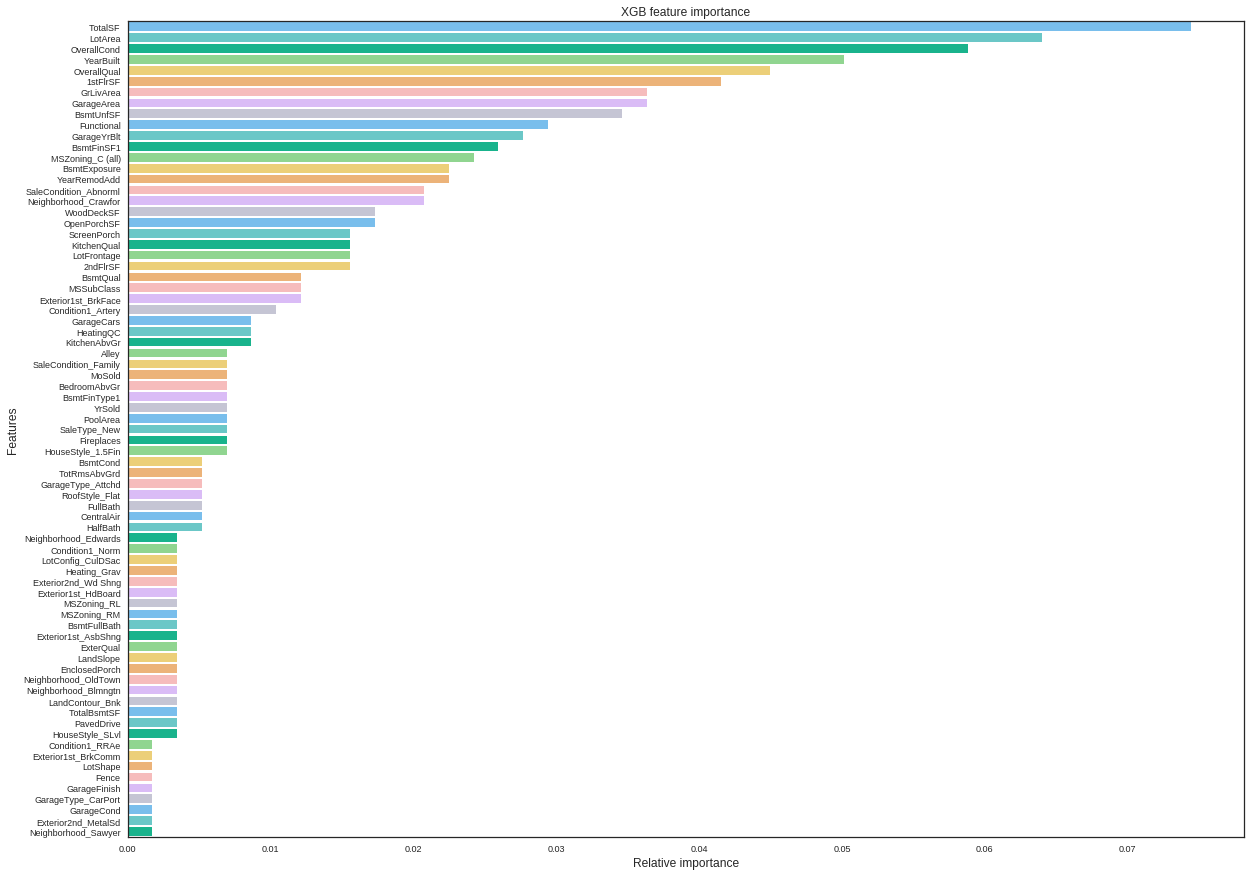

In [0]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(train, y_train)

indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices], orient='h', palette = mycols)
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

#### Cell Report:
* In the avobe graph we see the XGB feature importance from there we can make importance decision for the feature 
* From the feature importances attribute we can select the most important features than we can reduce estimation,validation and test datasets 
* we can see the Results of feature importances of train and test set

In [0]:
xgb_train = train.copy()
xgb_test = test.copy()

import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)

xgb_feat_red = SelectFromModel(model, prefit = True)

xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
X_train:  (1458, 47) 
X_test:  (1459, 47)


#### Cell Report:
* Next we want to sample our training data to test for performance of robustness ans accuracy before applying to the test data
* X_train = predictor features for estimation dataset
* X_test = predictor variables for validation dataset
* Y_train = target variable for the estimation dataset
* Y_test = target variable for the estimation dataset

In [0]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(xgb_train, y_train, test_size=0.3, random_state=42)

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

X_train:  (1020, 47) 
X_test:  (438, 47) 
Y_train:  (1020,) 
Y_test:  (438,)


<a id='training'></a>
### 4.2 Advanced Models :

We are finally ready to train our models. For this analysis I am using 8 different algorithms:
- **Kernel Ridge Regression**
- **Elastic Net**
- **Lasso**
- **Gradient Boosting**
- **Bayesian Ridge**
- **Lasso Lars IC**
- **Random Forest Regressor**
- **XGBoost**

The method of measuring accuracy was chosen to be **Root Mean Squared Error**

In [0]:
import xgboost as xgb

models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]


shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

row_index = 0
for alg in models:


    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    before_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(X_train, Y_train)
    
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt(((Y_test-alg.predict(X_test))**2).mean())
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)*100
    before_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 KernelRidge trained...
2 ElasticNet trained...
3 Lasso trained...
4 GradientBoostingRegressor trained...
5 BayesianRidge trained...
6 LassoLarsIC trained...


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


7 RandomForestRegressor trained...
8 XGBRegressor trained...


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KernelRidge,"{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma':...",11.555,11.711
1,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",37.209,38.140
2,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",39.045,39.657
3,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",12.686,11.865
4,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'compute_...",11.589,11.723
5,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 2....",12.758,11.868
6,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",15.065,14.777
7,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",12.657,11.974


#### Cell Report:
- We can see that each of the models performs with varying ability, with **KernelRidge** having the best accuracy score on the training dataset and accuracy on the validation dataset.

# 5.Neural Network 
<p style='text-align: justify;'>In this section we have implemented A neural network architecture using Tensorflow Low level APIs. The purpose of this implementation is to predict the sale-price of Test-dataset based on a well-trained model that shows very less RMS error on validation-dataset. In order to materialize this purpose we have implemented Grid-search to find the best-combination of trainable hyper-parameters that performs better on both train and validation datsets.<p>

### 5.1 Data preprocess:
<p style='text-align: justify;'>Lets preprocess data and make one hot ancode of categorical vlaues. The Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.</p>


In [0]:
def pre_process_data(df):
   
    # one-hot encode categorical values
    df = pd.get_dummies(df)

    return df


def mini_batches(train_set, train_labels, mini_batch_size):
    
    set_size = train_set.shape[zero]
    batches = []
    num_complete_minibatches = set_size // mini_batch_size

    for k in range(zero, num_complete_minibatches):
        mini_batch_x = train_set[k * mini_batch_size: (k + 1) * mini_batch_size]
        mini_batch_y = train_labels[k * mini_batch_size: (k + 1) * mini_batch_size]
        mini_batch = (mini_batch_x, mini_batch_y)
        batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if set_size % mini_batch_size != zero:
        mini_batch_x = train_set[(set_size - (set_size % mini_batch_size)):]
        mini_batch_y = train_labels[(set_size - (set_size % mini_batch_size)):]
        mini_batch = (mini_batch_x, mini_batch_y)
        batches.append(mini_batch)

    return batches

#### output submission: 
<p align="justify"> Here the parameter predction_column is name of the output predction column. The function returns output a csv with ids and predictions<p>

In [0]:
import csv
import pandas as pd
import numpy as np
zero = 0

def output_submission(test_ids, predictions, id_column, predction_column, file_name):

    print('Outputting submission...')
    with open('/content/drive/My Drive/Hiperdyne/House price' + file_name, 'w') as submission:
        writer = csv.writer(submission)
        writer.writerow([id_column, predction_column])
        for test_id, test_prediction in zip(test_ids, predictions):
            writer.writerow([test_id, test_prediction])
    print('Output complete')

#### Placeholder:
<p style='text-align: justify;'>A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph without needing the data. In TensorFlow terminology we then feed data into the graph through these placeholders.</p>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def create_placeholders(input_size, output_size):

    x = tf.placeholder(shape=(None, input_size), dtype=tf.float32, name="X")
    y = tf.placeholder(shape=(None, output_size), dtype=tf.float32, name="Y")

    return x, y

### 5.2 Implementing forward propagation:
<p style='text-align: justify;'> Input X provides the initial information that propagates to the hidden units at each layer and finally produce the output $\widehat{Y}$. The architecture of the network entails determining its depth, width, and activation functions used on each layer. Depth is the number of hidden layers. Width is the number of units (nodes) .The param x is data- pandas array of shape (input size, number of examples). Ths param: parameters is output. The parameter keep_prob is probability to keep each node of the layer and param hidden_activation is activation function of the hidden layers:return: last LINEAR value <p>

In [0]:
def forward_propagation(x, parameters, keep_prob=1, hidden_activation='relu'):

    a_dropout = x
    n_layers = len(parameters) // 2  # number of layers in the neural network

    for l in range(1, n_layers):
        a_prev = a_dropout
        a_dropout = linear_activation_forward(a_prev, parameters['w%s' % l], parameters['b%s' % l], hidden_activation)

        if keep_prob < 1:
            a_dropout = tf.nn.dropout(a_dropout, keep_prob)

    al = tf.matmul(a_dropout, parameters['w%s' % n_layers]) + parameters['b%s' % n_layers]

    return al

### 5.3 Implementing linear activation:
<p style='text-align: justify;'>Implement the forward propagation for the LINEAR->ACTIVATION layer

Arguments:A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
W -- weights matrix: numpy array of shape (size of current layer, size of previous layer),b -- bias vector, numpy array of shape (size of the current layer, 1), the activation parameter that is used in this layer, stored as a text string: "sigmoid" or "relu".

The function returns parameter A -- the output of the activation function, also called the post-activation value cache -- a python dictionary containing "linear_cache" and "activation_cache"; stored for computing the backward pass efficiently</p>
   

In [0]:
def linear_activation_forward(a_prev, w, b, activation):
    
    a = None
    if activation == "sigmoid":
        z = tf.matmul(a_prev, w) + b
        a = tf.nn.sigmoid(z)

    elif activation == "relu":
        z = tf.matmul(a_prev, w) + b
        a = tf.nn.relu(z)

    elif activation == "leaky-relu":
        z = tf.matmul(a_prev, w) + b
        a = tf.nn.leaky_relu(z)

    return a

#### Initialize parameter:
<p style='text-align: justify;'>Argument:The param layer_dims is python array (list) containing the dimensions of each layer in our network and returns python dictionary containing your parameters  n_x -- size of the input layer, n_h -- size of the hidden layer n_y -- size of the output layer.
Returns:parameters -- python dictionary containing your parameters: W1 -- weight matrix of shape (n_h, n_x), b1 -- bias vector of shape (n_h, 1),W2 -- weight matrix of shape (n_y, n_h), b2 -- bias vector of shape (n_y, 1)</p>

In [0]:
def initialize_parameters(layer_dims, weight_initializer):

    parameters = {}
    n_layers = len(layer_dims) 
    
    for l in range(1, n_layers):
        if(weight_initializer == 'random_normal'):
           parameters['w' + str(l)] = tf.get_variable('w' + str(l), [layer_dims[l - 1], layer_dims[l]],
                                                   initializer = tf.random_normal_initializer)
        else:
           parameters['w' + str(l)] = tf.get_variable('w' + str(l), [layer_dims[l - 1], layer_dims[l]],
                                                   initializer = tf.contrib.layers.xavier_initializer())
        parameters['b' + str(l)] = tf.get_variable('b' + str(l), [layer_dims[l]], initializer=tf.zeros_initializer())

    return parameters

#### Compute cost:
The param z3 is output of forward propagation (output of the last LINEAR unit) and parameter y is "true" labels vector placeholder, same shape as Z3. It returns Tensor of the cost function (RMSE as it is a regression)

In [0]:
def compute_cost(z3, y):
    
    cost = tf.sqrt(tf.reduce_mean(tf.square(y - z3)))

    return cost


#### Prediction:
Make a prediction based on a data set and parameters The param data is based data set. The param parameters is based parameters. The function returns array of prediction

In [0]:
def predict(data, parameters):

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)

        dataset = tf.cast(tf.constant(data), tf.float32)
        fw_prop_result = forward_propagation(dataset, parameters)
        prediction = fw_prop_result.eval()

    return prediction

#### Rmse Error calculation:
Calculates cost between two data sets. param predictions is data set of predictions. param labels is data set of labels (real values) . It returns percentage of correct predictions.

In [0]:



def rmse(predictions, labels):

    prediction_size = predictions.shape[zero]
    prediction_cost = np.sqrt(np.sum(np.square(labels - predictions)) / prediction_size)

    return prediction_cost


def rmsle(predictions, labels):

    prediction_size = predictions.shape[zero]
    prediction_cost = np.sqrt(np.sum(np.square(np.log(predictions + 1) - np.log(labels + 1))) / prediction_size)

    return prediction_cost

#### Regularization
Function to apply l2 regularization to the model. The param cost is usual cost of the model. The param l2_beta is beta value used for the normalization. The param parameters: is parameters from the model (used to get weights values) . The function returns cost updated

In [0]:


def l2_regularizer(cost, l2_beta, parameters, n_layers):

    regularizer = zero
    for i in range(1, n_layers):
        regularizer += tf.nn.l2_loss(parameters['w%s' % i])

    cost = tf.reduce_mean(cost + l2_beta * regularizer)

    return cost


def build_submission_name(layers_dims, num_epochs, lr_decay,
                          learning_rate, l2_beta, keep_prob, minibatch_size, num_examples):
    
    submission_name = 'ly{}-epoch{}.csv' \
        .format(layers_dims, num_epochs)

    if lr_decay != zero:
        submission_name = 'lrdc{}-'.format(lr_decay) + submission_name
    else:
        submission_name = 'lr{}-'.format(learning_rate) + submission_name

    if l2_beta > zero:
        submission_name = 'l2{}-'.format(l2_beta) + submission_name

    if keep_prob < 1:
        submission_name = 'dk{}-'.format(keep_prob) + submission_name

    if minibatch_size != num_examples:
        submission_name = 'mb{}-'.format(minibatch_size) + submission_name

    return submission_name

#### Plot the model parameter :
<p style='text-align: justify;'>The parameter train_costs: array with the costs from the model training . parameter validation_costs is array with the costs from the model validation. parameter submission_name is name of the submission (used for the plot title)</p>

In [0]:
def plot_model_cost(train_costs, validation_costs, set_optimizer, weight_initializer, hidden_activation):
    plt.plot(np.squeeze(train_costs), label='Train cost')
    plt.plot(np.squeeze(validation_costs), label='Validation cost')
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title('Optimizer: '+set_optimizer+' |  Weight-initializer: '+ weight_initializer+' | Activation: '+hidden_activation)
    plt.legend()
    plt.show()

In [0]:
def plot_pred(validation_labels, prediction):
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.style.use('ggplot')
    plt.plot(prediction, validation_labels, 'ro')
    ax.plot([min(validation_labels), max(validation_labels)], [min(validation_labels), max(validation_labels)], 'k--', lw=4)
    plt.xlabel('Predictions')
    plt.ylabel('Reality')
    plt.title('Predictions vs Reality on dataset Test')
    plt.show()  

### 5.4 Building Train and Validation datasets:
<p style='text-align: justify;'>First of all we get the training and test data set and saparate the labels in SalesPrice column . Then we perform one hot encoding once again to convert any accidentally remaining non-categorical columns into categorical columns. We replaceing all missing values with zero if there is still any. We then create a matric for train and test data and using standard-scaler we scale the data.We create separate validation data set.Lets see the number of test and training data set and there shape.</p>

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.python.framework import ops
import sklearn
from sklearn.model_selection import ParameterGrid
import logging
def keep_every_nth_info(n):
    i = -1
    def filter_record(record):
        nonlocal i
        i += 1
        return int( i % n == 15)
    return filter_record

logging.getLogger('tensorflow').addFilter(keep_every_nth_info(15))

train = trainFeatured
test = testFeatured
print("number of training examples = " + str(train.shape[zero]))
print("number of test examples = " + str(test.shape[zero]))
print("train shape: " + str(train.shape))
print("test shape: " + str(test.shape))

train_raw_labels = trainNoOutlier['SalePrice'].to_frame().as_matrix()

train_pre = pre_process_data(train)
test_pre = pre_process_data(test)

train_pre, test_pre = train_pre.align(test_pre, join='outer', axis=1)

train_pre.replace(to_replace=np.nan, value=zero, inplace=True)
test_pre.replace(to_replace=np.nan, value=zero, inplace=True)


train_pre = train_pre.as_matrix().astype(np.float)
test_pre = test_pre.as_matrix().astype(np.float)

standard_scaler = preprocessing.StandardScaler()
train_pre = standard_scaler.fit_transform(train_pre)
test_pre = standard_scaler.fit_transform(test_pre)


X_train, X_valid, Y_train, Y_valid = train_test_split(train_pre, train_raw_labels, test_size=0.3, random_state=1)

input_size = train_pre.shape[1]
output_size = 1
hidden_neurons = 500
num_epochs = 10000
learning_rate = 1e-2

number of training examples = 1458
number of test examples = 1459
train shape: (1458, 79)
test shape: (1459, 79)


### 5.5 Defining the ANN Model:
<p style='text-align: justify;'>Lets defined a model which apply  batch wise training process .Now define a neurral network which  has  two  hidden layer and every hidden layer there have 500 neurons. we can change the number of hidden neurons.we can define the number of samples in a batch with the min batch variable.we define learning rate and tune it by lr_decay variable.we can use optimizer RMS-prop and adam though we use here RMS-prop as default.As hidden layer activation function we can use relu,leaky-relu and sigmoid. Scale of drop-out neurons is defined using keep_prob variable.</p>


In [0]:
def model(train_set=X_train, train_labels=X_valid, validation_set=Y_train, validation_labels=Y_valid, input_size=input_size, 
          hidden_neurons=hidden_neurons, output_size = output_size, learning_rate=1e-2, num_epochs=500,print_cost=False, 
          plot_cost=True, l2_beta=10, keep_prob=0.7,hidden_activation='leaky-relu', return_best=False, minibatch_size=zero, 
          set_optimizer = 'RMS-Prop',weight_initializer='random_normal',show_result=True,lr_decay=zero):

    ops.reset_default_graph()
    layers_dims = [input_size, hidden_neurons, hidden_neurons, output_size]
    input_size = layers_dims[zero]
    output_size = layers_dims[-1]
    num_examples = train_set.shape[zero]
    n_layers = len(layers_dims)
    train_costs = []
    validation_costs = []
    best_iteration = [float('inf'), zero]
    best_params = None

    if minibatch_size == zero or minibatch_size > num_examples:
        minibatch_size = num_examples

    num_minibatches = num_examples // minibatch_size

    if num_minibatches == zero:
        num_minibatches = 1

    submission_name = build_submission_name(layers_dims, num_epochs, lr_decay, learning_rate, l2_beta, keep_prob,
                                            minibatch_size, num_examples)

    x, y = create_placeholders(input_size, output_size)
    tf_valid_dataset = tf.cast(tf.constant(validation_set), tf.float32)
    parameters = initialize_parameters(layers_dims, weight_initializer)

    fw_output_train = forward_propagation(x, parameters, keep_prob, hidden_activation)
    train_cost = compute_cost(fw_output_train, y)

    fw_output_valid = forward_propagation(tf_valid_dataset, parameters, 1, hidden_activation)
    validation_cost = compute_cost(fw_output_valid, validation_labels)

    if l2_beta > zero:
        train_cost = l2_regularizer(train_cost, l2_beta, parameters, n_layers)
        validation_cost = l2_regularizer(validation_cost, l2_beta, parameters, n_layers)

    if lr_decay != zero:
        global_step = tf.Variable(zero, trainable=False)
        learning_rate = tf.train.inverse_time_decay(learning_rate, global_step=global_step, decay_rate=lr_decay,
                                                    decay_steps=1)
        if(set_optimizer == 'adam'):
            optimizer = tf.train.AdamOptimizer(learning_rate).minimize(train_cost, global_step=global_step)
        else:
            optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(train_cost, global_step=global_step)
          
    else:
        if(set_optimizer == 'adam'):
            optimizer = tf.train.AdamOptimizer(learning_rate).minimize(train_cost)
        else:
            optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(train_cost)

    
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        
        sess.run(init)

        for epoch in range(num_epochs):
            train_epoch_cost = zero
            validation_epoch_cost = zero

            minibatches = mini_batches(train_set, train_labels, minibatch_size)

            for minibatch in minibatches:
                
                (minibatch_X, minibatch_Y) = minibatch
                feed_dict = {x: minibatch_X, y: minibatch_Y}

                
                _, minibatch_train_cost, minibatch_validation_cost = sess.run(
                    [optimizer, train_cost, validation_cost], feed_dict=feed_dict)

                train_epoch_cost += minibatch_train_cost / num_minibatches
                validation_epoch_cost += minibatch_validation_cost / num_minibatches

            if print_cost is True and epoch % (2000) == zero:
                print("Train cost after epoch %i: %f" % (epoch, train_epoch_cost))
                print("Validation cost after epoch %i: %f" % (epoch, validation_epoch_cost))

            if plot_cost is True and epoch % 9 == zero:
                train_costs.append(train_epoch_cost)
                validation_costs.append(validation_epoch_cost)

            if return_best is True and validation_epoch_cost < best_iteration[zero]:
                best_iteration[zero] = validation_epoch_cost
                best_iteration[1] = epoch
                best_params = sess.run(parameters)

        if return_best is True:
            parameters = best_params
        else:
            parameters = sess.run(parameters)

        train_rmse = rmse(predict(train_set, parameters), train_labels)
        validation_rmse = rmse(predict(validation_set, parameters), validation_labels)
        train_rmsle = rmsle(predict(train_set, parameters), train_labels)
        validation_rmsle = rmsle(predict(validation_set, parameters), validation_labels)
        if show_result is True:
            print('Train rmsle: {:.4f}'.format(train_rmsle))
            print('Validation rmsle: {:.4f}'.format(validation_rmsle))

        submission_name = 'tr_cost-{:.2f}-vd_cost{:.2f}-'.format(train_rmse, validation_rmse) + submission_name

        if return_best is True:
            print('Lowest rmse: {:.2f} at epoch {}'.format(best_iteration[zero], best_iteration[1]))

        if plot_cost is True:
            plot_model_cost(train_costs, validation_costs, set_optimizer, weight_initializer, hidden_activation)

        return train_rmsle, validation_rmsle, parameters, submission_name

#### Lets see the learning curve for default parameters :

Train rmsle: 0.1631
Validation rmsle: 0.1751


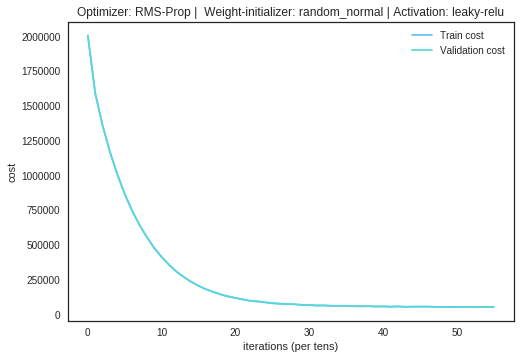

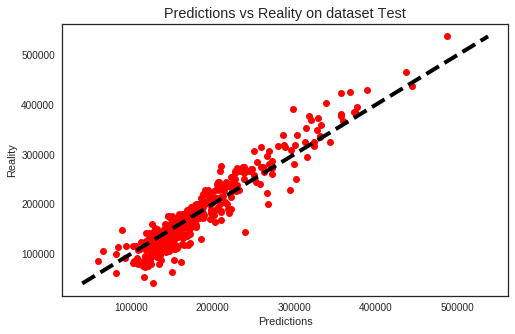

In [0]:
train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid)
plot_pred(Y_valid, predict(X_valid, parameters))

#### Cell Report:
<p style='text-align: justify;'>For the Models we use the default combination of hyper-parameters.'Root_mean_squared_error' was used as loss function.This is a Basic Model. So, Hyperparameters and Layers were chosen based on intuition.
we can see the training and validation error difference is low but both rms-log errors are high.Now we have to minizime the validation rmsle. First of all lets change the optimer, initializer and activation-Function of the model</p>

Train rmsle: 6.9577
Validation rmsle: 6.9399


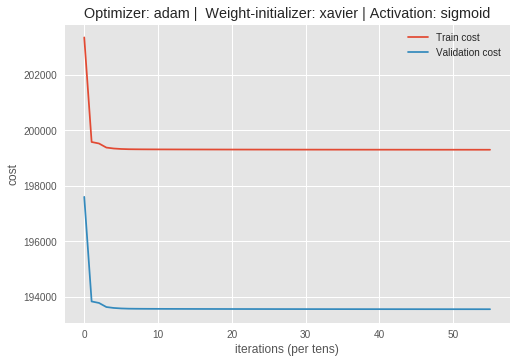

In [0]:
train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,set_optimizer = 'adam',
                                                                    weight_initializer='xavier',hidden_activation='sigmoid' )

#### Cell Report:
In this curve we see that when we use adam as optimizer and xavier as weight-initializer with sigmoid activation-function, traning and validation rmsle error is huge.so we have to reduce this error and make it perfect by using some parameter tuning method.

### 5.6 GridSearch:
<p style='text-align: justify;'>GridSearchCV uses a grid of parameters to optimise parameter-combinations. This grid can get extremely large, and therefore requires a lot of computation power to complete. I have included a set of answers in the grids to cut down computation time. For the parameter grid I apply grid search on optimizer, initializer and activation.Grid search takes all combination and check train error and validation error.From the combinations of parametrs we will take the best combination that minimizes the errors.</p>

In [0]:
#lets apply grid-search on 
param_grid = {'Optimizer':['adam','RMS-Prop'],
              'Initializer':['xavier','random-normal'],
              'Activation':['relu','sigmoid','leaky-relu']}
grid = ParameterGrid(param_grid)
all_combinations = []
all_train_error = []
all_validation_error = []
for params in grid:
train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,hidden_activation=params['Activation'],
                                                    weight_initializer = params['Initializer'],show_result=False,
                                                    set_optimizer = params['Optimizer'],plot_cost=False)
all_combinations.append(str(list(params.values())))
all_train_error.append(train_rmsle)
all_validation_error.append(validation_rmsle)
  
parameter_combinations = pd.DataFrame(
    {'Combination': all_combinations,
     'Train-error': all_train_error,
     'Validation-error': all_validation_error
    })
parameter_combinations

,Combination,Train-error,Validation-error
0,"['relu', 'xavier', 'adam']",0.084,0.149
1,"['relu', 'xavier', 'RMS-Prop']",0.134,0.226
2,"['relu', 'random-normal', 'adam']",0.084,0.148
3,"['relu', 'random-normal', 'RMS-Prop']",0.137,0.239
4,"['sigmoid', 'xavier', 'adam']",6.958,6.940
5,"['sigmoid', 'xavier', 'RMS-Prop']",6.843,6.825
6,"['sigmoid', 'random-normal', 'adam']",6.958,6.940
7,"['sigmoid', 'random-normal', 'RMS-Prop']",6.849,6.831
8,"['leaky-relu', 'xavier', 'adam']",0.094,0.146
9,"['leaky-relu', 'xavier', 'RMS-Prop']",0.161,0.184


#### Cell Report:
Here we see that from the all combination of result we have found that  'relu', 'xavier', ''adam' have best result .So now we use our best combination and we will see the result of train rmsle and validation rmsle graphically.

Train rmsle: 0.0821
Validation rmsle: 0.1459


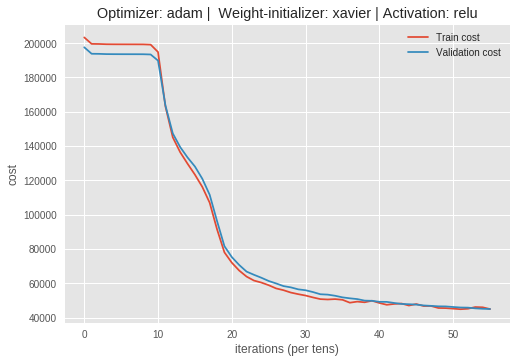

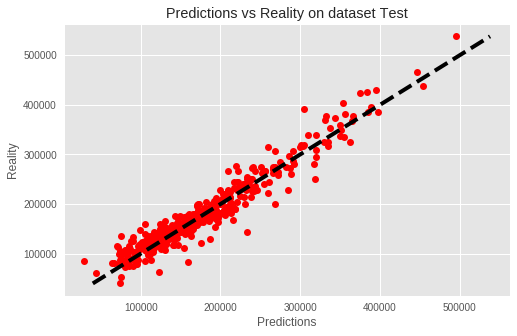

In [0]:
train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,set_optimizer = 'adam',
                                                                    weight_initializer='xavier',hidden_activation='relu' )
plot_pred(Y_valid, predict(X_valid, parameters))

#### Cell Report:
<p style='text-align: justify;'>After using optimizer as adam and weight initizlizer as xavier and activation  function as relu our training rmsl and validation rmsl result is improved and  training and validation error is reduced. From the 2nd figure we see that marginal line  has passed through maximam dots .The reality and the prediction data set is closer than before.Thats why marginal is found positioned through the middle area of the dotted region. For the betterment of result lets apply grid on trainable hyperparameters. we will find the best combination of the hyper parameters that minimizes the losses.</p>

In [0]:
#lets apply grid-search on 
param_grid = {'keep_prob':[0.6,0.7,0.9],
              'learn-rate':[1e-2,2e-2],
              'lr_decay':[0,0.01e-2],
              'l2_beta':[0,10]}
grid = ParameterGrid(param_grid)
all_combinations = []
all_train_error = []
all_validation_error = []
for params in grid:
train_rmsle, validation_rmsle, parameters,submission_name = model(X_train, Y_train, X_valid, Y_valid,hidden_activation='relu',
                                                    weight_initializer='xavier', set_optimizer = 'adam',
                                                    keep_prob=params['keep_prob'],learning_rate=params['learn-rate'],
                                                    print_cost=False, plot_cost=False,show_result=False,
                                                    l2_beta=params['l2_beta'],return_best=False,
                                                    lr_decay=params['lr_decay'])
all_combinations.append(str(params))
all_train_error.append(train_rmsle)
all_validation_error.append(validation_rmsle)
  
pd.options.display.max_colwidth = 140 
parameter_combinations = pd.DataFrame(
    {'combination': all_combinations,
     'train_error': all_train_error,
     'validation_error': all_validation_error
    })
parameter_combinations = parameter_combinations.sort_values(by='validation_error', ascending=True)
parameter_combinations[:10]                                                                 

,combination,train_error,validation_error
23,"{'keep_prob': 0.9, 'l2_beta': 10, 'learn-rate': 0.02, 'lr_decay': 0.0001}",0.085,0.135
22,"{'keep_prob': 0.9, 'l2_beta': 10, 'learn-rate': 0.02, 'lr_decay': 0}",0.087,0.136
14,"{'keep_prob': 0.7, 'l2_beta': 10, 'learn-rate': 0.02, 'lr_decay': 0}",0.091,0.137
15,"{'keep_prob': 0.7, 'l2_beta': 10, 'learn-rate': 0.02, 'lr_decay': 0.0001}",0.091,0.140
7,"{'keep_prob': 0.6, 'l2_beta': 10, 'learn-rate': 0.02, 'lr_decay': 0.0001}",0.095,0.141
6,"{'keep_prob': 0.6, 'l2_beta': 10, 'learn-rate': 0.02, 'lr_decay': 0}",0.096,0.144
13,"{'keep_prob': 0.7, 'l2_beta': 10, 'learn-rate': 0.01, 'lr_decay': 0.0001}",0.083,0.145
21,"{'keep_prob': 0.9, 'l2_beta': 10, 'learn-rate': 0.01, 'lr_decay': 0.0001}",0.079,0.146
20,"{'keep_prob': 0.9, 'l2_beta': 10, 'learn-rate': 0.01, 'lr_decay': 0}",0.080,0.146
12,"{'keep_prob': 0.7, 'l2_beta': 10, 'learn-rate': 0.01, 'lr_decay': 0}",0.086,0.147


#### Cell Report:
Here we see the best combination of parameters (ID: 23) for the best result in training and validation error.For the time and machine low configration i use some few of combinations for showing the result .Lets take the best combination result and use it to see the results graphically.

Train rmsle: 0.0860
Validation rmsle: 0.1395


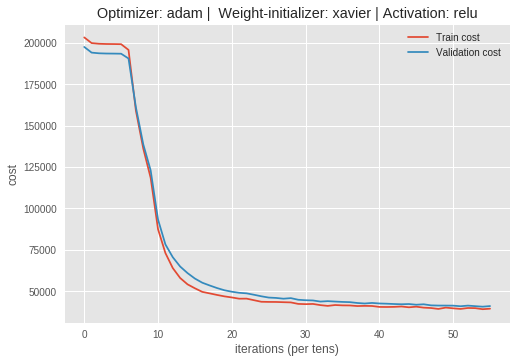

In [0]:
train_rmsle, validation_rmsle, parameters,submission_name = model(X_train, Y_train, X_valid, Y_valid,hidden_activation='relu',
                                                    weight_initializer='xavier', set_optimizer = 'adam',
                                                    keep_prob=0.9,learning_rate=0.02, num_epochs=500,
                                                    print_cost=False, plot_cost=True,show_result=True,
                                                    l2_beta=10,return_best=False,
                                                    lr_decay=0.0001)

#### Cell Report:
In this graph the result is improved from previous result and we use  adam optimizer,weight initializer as xavier and activation function as relu. Now lets increase the number of epochs and see whether the errors decrease or not.

Train rmsle: 0.0927
Validation rmsle: 0.1264


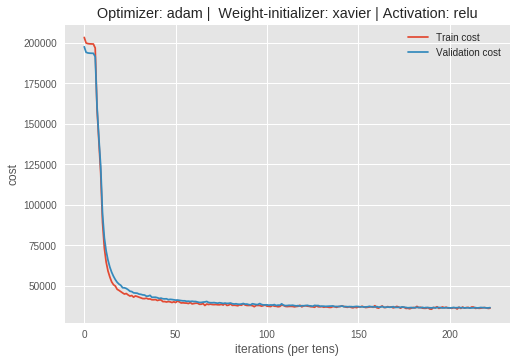

In [0]:
train_rmsle, validation_rmsle, parameters,submission_name = model(X_train, Y_train, X_valid, Y_valid,hidden_activation='relu',
                                                    weight_initializer='xavier', set_optimizer = 'adam',
                                                    keep_prob=0.9,learning_rate=0.02, num_epochs=2000,
                                                    print_cost=False, plot_cost=True,show_result=True,
                                                    l2_beta=10,return_best=False,
                                                    lr_decay=0.0001)

#### Cell Report:
So when we increased the number of epochs the validation rmsle result improved more than previous one. Lets increase the epochs further and discover what happens...

Train rmsle: 0.0916
Validation rmsle: 0.1261


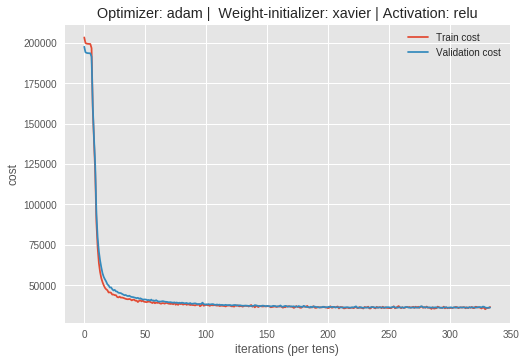

In [0]:
train_rmsle, validation_rmsle, parameters,submission_name = model(X_train, Y_train, X_valid, Y_valid,hidden_activation='relu',
                                                    weight_initializer='xavier', set_optimizer = 'adam',
                                                    keep_prob=0.9,learning_rate=0.02, num_epochs=3000,
                                                    print_cost=False, plot_cost=True,show_result=True,
                                                    l2_beta=10,return_best=False,
                                                    lr_decay=0.0001)

#### Cell Report:
Lets have a look here we see that changing of epochs size reduces errors by a bit but such reduction does not make any big difference. But on the other hand it takes too much time than the previous one.

#### Best combination choose:
so the parameter combination of the 2nd model has been chosen as the final comnination to predict the test data.Where Train rmsle: 0.0927,Validation rmsle: 0.1264.Now we will use this model to predict the test data.

## Result:
<p style='text-align: justify;'>The model is tunned varying the trainable hyperparameters using grid-search. The tunning was in a small range of combinations. and we kept the batch-size constant all throgh the tunning process. So there is still scope for better tunning. Multiple model combinations that performed well can also be ensembled to achieve even better performance. We eventually ensembled our ANN model with the previously discussed regressor models to achieve better score in kaggle.</p>

#### Generate Submission-File

<p>Before generatting the submission-file we will reduce the size of validation to 1% of training and then use the model with best parameter-combination to be trained and predict the test data. The prediction will be stored as a CSV file which will be use as the final submission to Kaggle.</p>

Train rmsle: 0.0999
Validation rmsle: 0.1171


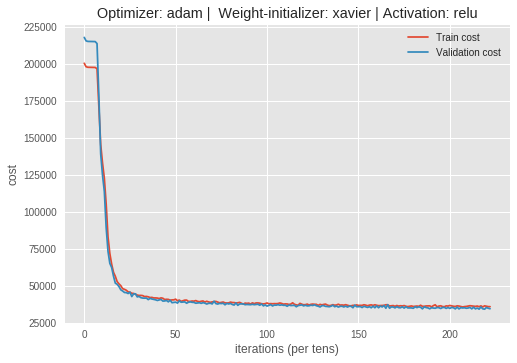

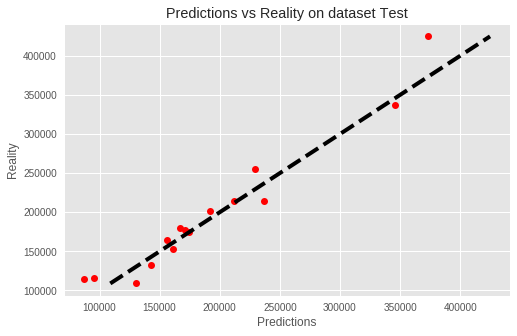

Outputting submission...
Output complete


In [0]:
X_train, X_valid, Y_train, Y_valid = train_test_split(train_pre, train_raw_labels, test_size=0.01, random_state=1)
train_rmsle, validation_rmsle, parameters,submission_name = model(X_train, Y_train, X_valid, Y_valid,hidden_activation='relu',
                                                    weight_initializer='xavier', set_optimizer = 'adam',
                                                    keep_prob=0.9,learning_rate=0.02, num_epochs=2000,
                                                    print_cost=False, plot_cost=True,show_result=True,
                                                    l2_beta=10,return_best=False,
                                                    lr_decay=0.0001)
plot_pred(Y_valid, predict(X_valid, parameters))

#Get predictions
prediction = list(map(lambda val: float(val), predict(test_pre, parameters)))

#Generate submission-file
output_submission(test_ID, prediction, 'Id', 'SalePrice', submission_name)

#### Kaggle Score(Screen Shot):
<p>Kaggle score using only ANN model</p>

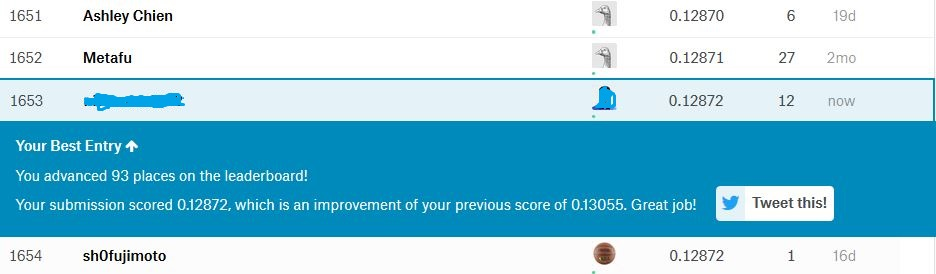

In [0]:
from IPython.display import Image
Image('Capture.JPG')

<p>Lastly  regression model outputs and best ANN output were ensembled using different weight factors and got the best result among these</p>

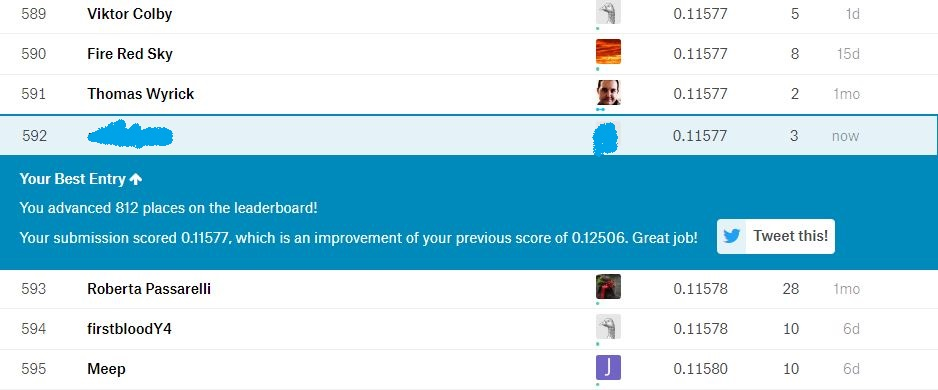

In [0]:
from IPython.display import Image
Image('Kaggle.JPG')

## Discussion:
<p style='text-align: justify;'>Finally a model  has been developed that can predict prices for houses in an area.Feature Engineering, Outlier Removal, Skewness Reduction and Hyper Parameter Tuning had great impact on the improvement of the Final Score.It is not the best model but trying more parameter tuning we can improved the result. Feature engineering had a profound impact on  model performance. The better we interpret data, the better performance we will get.Grid search  also helped to achieve great results in the end.</p>

## Conclusion:
<p style='text-align: justify;'>Throughout this notebook,I wanted to focus mainly on feature engineering,Pre-processing,handling imblance data,optimization of hyper parameter,regression algorithm and DNN model with applying grid technique.I think Griding is a very useful tool to have within Data Science toolkit.</p>

## References:
<p>1.https://www.kaggle.com/narenrsuri/predicting-house-prices-in-ames-iowa/data?</p>
<p>2.https://www.kaggle.com/karthikramesh55/iowa-housing-price-prediction-regression-models/notebook?</p>
<p>3.https://www.kaggle.com/zoupet/neural-network-model-for-house-prices-tensorflow?</p>
<p>4.https://nycdatascience.com/blog/student-works/predictive-modeling-on-house-prices-ames-iowa/</p>